# STA 141B: Homework 6
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Samuel

Last Name: Kadin

Student ID: 913351901

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Web scraping the Aggie

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [1]:
import pandas as pd
import requests
import requests_cache
import re
from bs4 import BeautifulSoup
import lxml
from collections import Counter
import lxml.html as lx
import numpy as np
from urllib.request import urlopen

In [2]:
def get_links(url, page=1):
    """Function: Scrapes UC Davis website and returns url lists and titles list
    
       Imput: Url (string), page (int)
       
       Output: url_list (list), title_list (list)
    """
    url_list = []
    title_list = []
    for i in range(page,0,-1):
        page_request2 = requests.get(url + 'page/' + str(i))
       
        page_text = page_request2.text
        page_bs = BeautifulSoup(page_text, 'lxml')
        tit = page_bs.find_all(name='h2',attrs = {'class':'entry-title'})
        for j in range(len(tit)):
            tit1 = tit[j].find_all('a')
            hrefx = tit1[0].attrs['href']
            #print(hrefx)
            url_list.append(hrefx)
            titlex = tit1[0].attrs['title']
            title_list.append(titlex)
    return(url_list,title_list)


__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

* If you are having trouble working with unicode characters see [the python 3 documentation](https://docs.python.org/3/howto/unicode.html).

In [3]:
def url_extract(url):
    """Function: Extracts article information from UC-Davis URL link.
    
       Imput: Url (string)
       
       Output: {author,text,title,url} (dict)
    """
    url_t = requests.get(url)
    url_t = url_t.text
    url_t = BeautifulSoup(url_t, "lxml")
    title = url_t.find_all(name = 'h1', attrs = {'class':'entry-title'})[0].getText()
    
    body = url_t.find_all(name = 'div', attrs = {'itemprop':'articleBody'})
    body = body[0].getText().splitlines()
    body_text = ""
    for i in range(2,len(body)-2):
        body_text = body_text + " " + body[i]
    body_text = re.sub('\xa0','',body_text)
    
    author = url_t.find_all(name = 'a', attrs = {'class':"author-name author"})[0].getText().strip().splitlines()[-1].strip('Written by:').split('—')[0]
    
    return({"author":author,'text':body_text,'title':title,'url':url})
#url_extract('https://theaggie.org/2018/02/26/inked/')

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [4]:
#get the 60 article links for campus and city

camp60,_ = get_links('https://theaggie.org/campus/',4)
city60,_ = get_links('https://theaggie.org/city/',4)

In [5]:
#create a dataframe that creates a list of all the information from each link in campus

cnl = pd.DataFrame()
for link in camp60:
    z = url_extract(link)
    z = pd.DataFrame.from_dict(z,orient = 'index').T
    z["category"] = "Campus"
    cnl = cnl.append(z)

In [6]:
#create a dataframe that creates a list of all the information from each link in caity
for link in city60:
    z = url_extract(link)
    z = pd.DataFrame.from_dict(z,orient = 'index').T
    z["category"] = ["City"]
    cnl = cnl.append(z)

In [7]:
#Check to make sure the link is 120

len(cnl)

120

__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [8]:
import wordcloud 
import matplotlib.pyplot as plt
import nltk
import random
%matplotlib inline 

In [9]:
#create a grey clor function (didn't even end up using this for)
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

#create new stop words specific to UC DAVIS
new_stw = wordcloud.STOPWORDS.union(set(["UC","Davis","said","event","year","student","college","students","people","will","also"]))


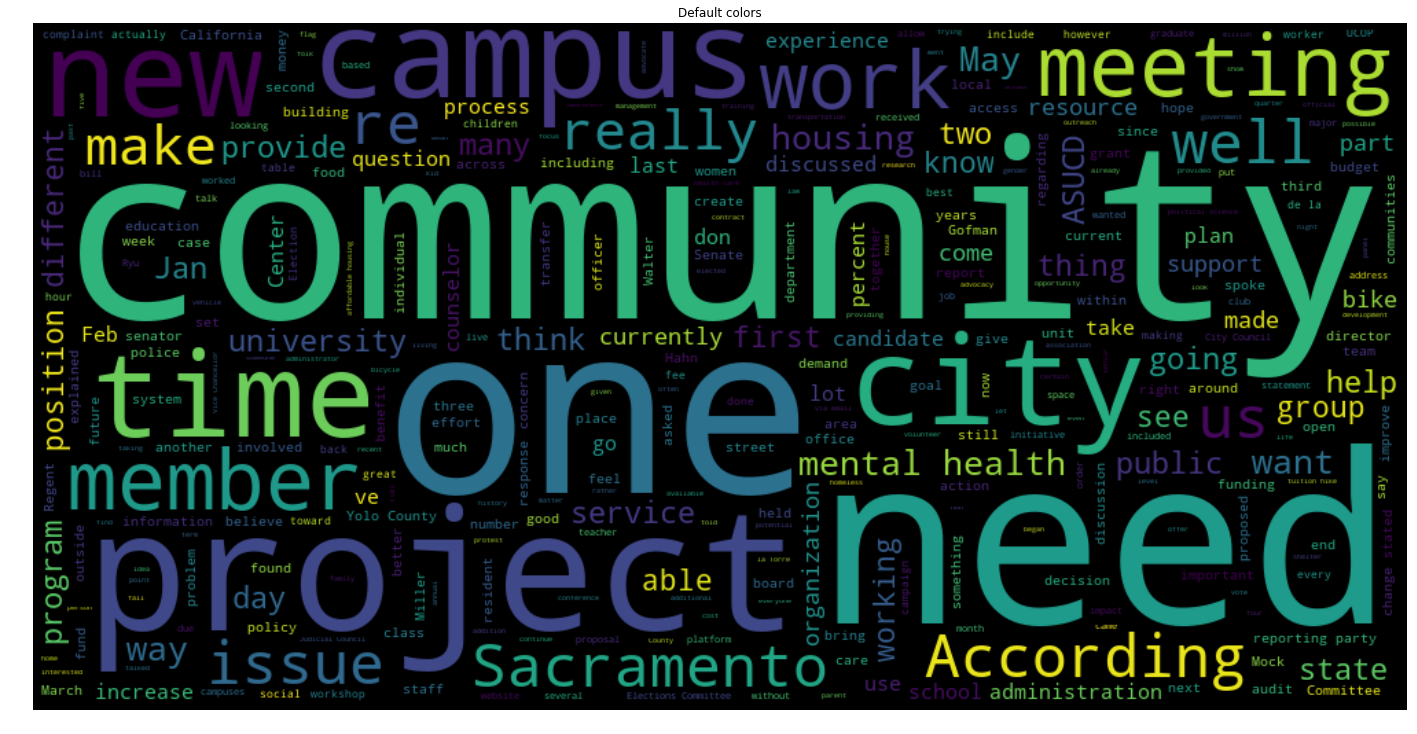

In [10]:
#combine the text into a single text file
text = "".join(cnl["text"])

#create a word cloud
wc = wordcloud.WordCloud(max_words=2500, stopwords=new_stw, margin=10,
               random_state=5,width = 1000,height = 500).generate(text)

plt.figure(figsize=(20,10))
plt.title("Default colors")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

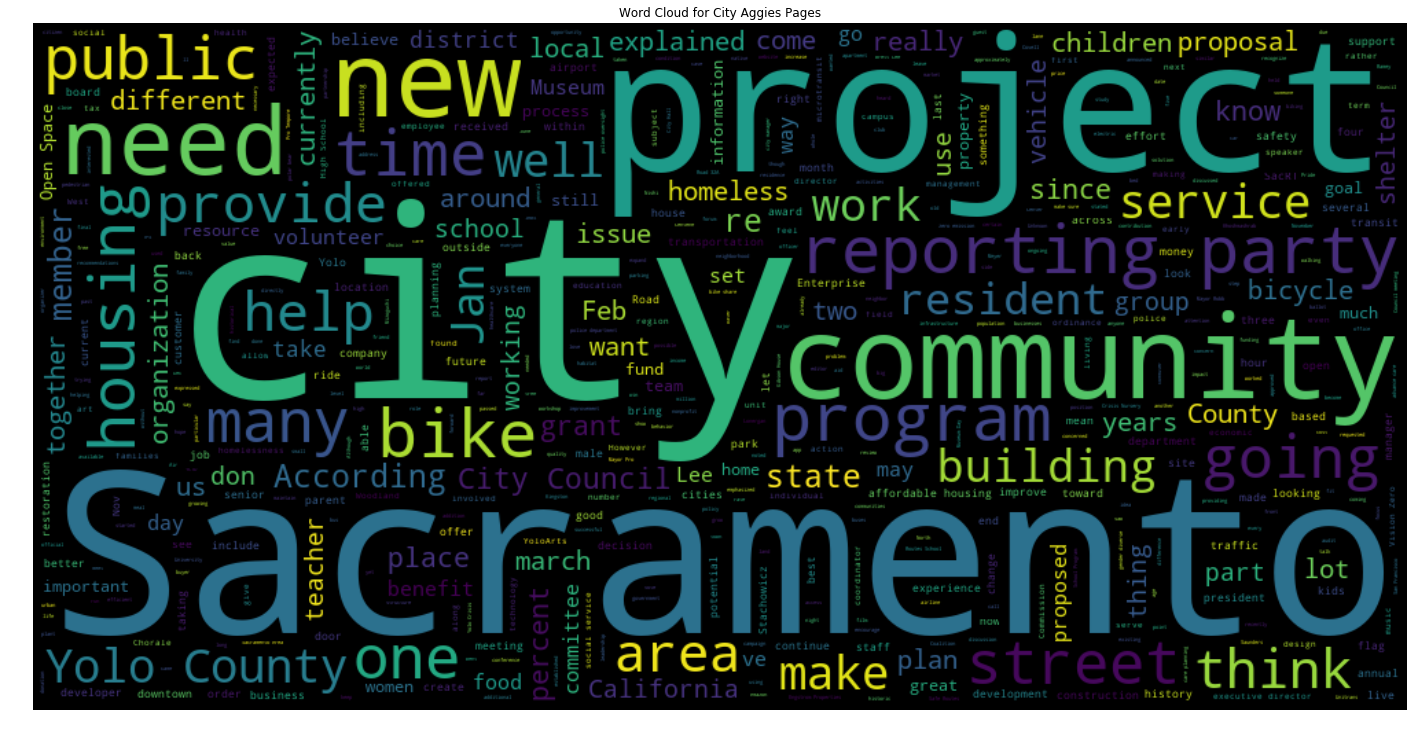

In [11]:
text = "".join(cnl[cnl["category"] == "City"]["text"])

wc = wordcloud.WordCloud(max_words=2500, stopwords=new_stw, margin=10,
               random_state=5,width = 1000,height = 500).generate(text)

plt.figure(figsize=(20,10))
plt.title("Word Cloud for City Aggies Pages")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

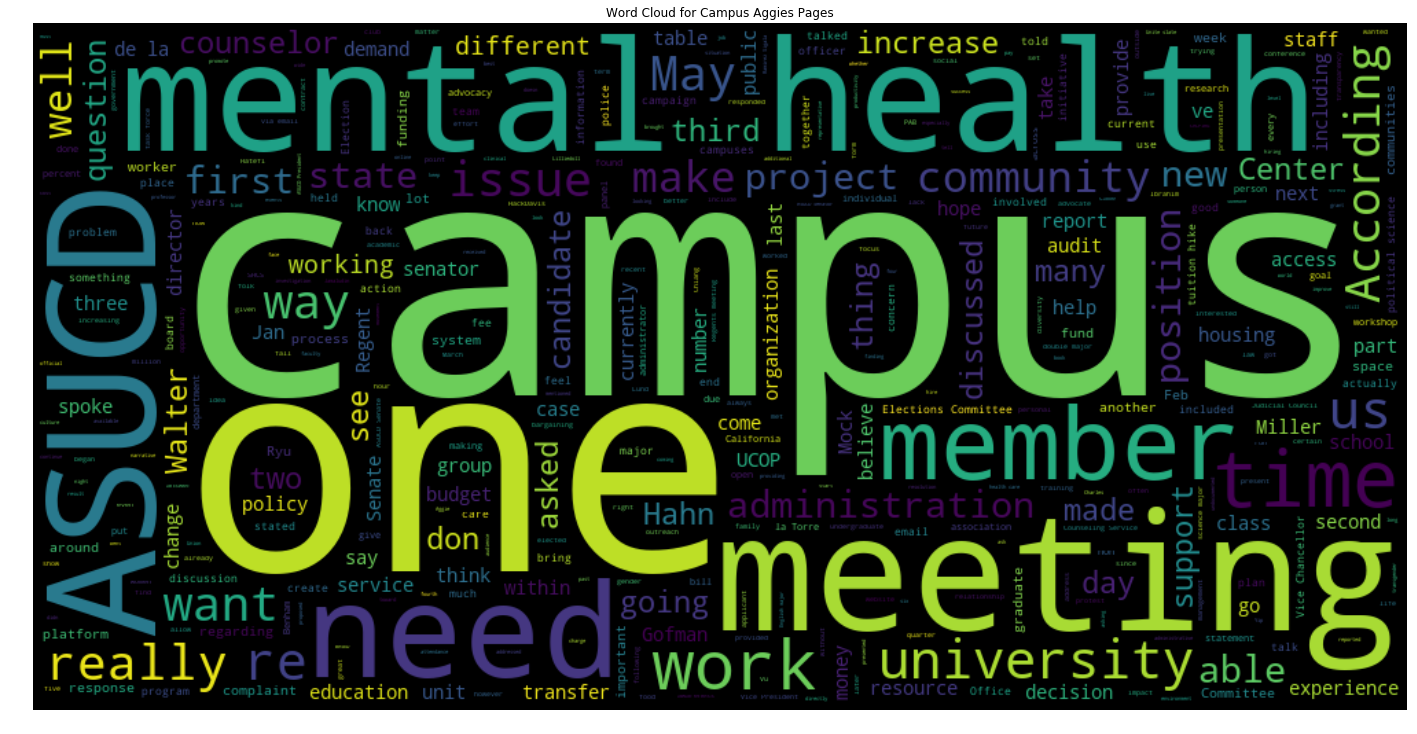

In [12]:
text = "".join(cnl[cnl["category"] == "Campus"]["text"])

wc = wordcloud.WordCloud(max_words=2500, stopwords=new_stw, margin=10,
               random_state=5,width = 1000,height = 500).generate(text)

plt.figure(figsize=(20,10))
plt.title("Word Cloud for Campus Aggies Pages")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
documents = list(cnl.text)

In [15]:
#1.4.2
#This is referenced from https://sites.temple.edu/tudsc/category/about-the-dsc/services/dsc-grad-students/
import nltk, string, numpy

nltk.download('punkt') # first-time use only

stemmer = nltk.stem.porter.PorterStemmer()

def StemTokens(tokens):
    """Function: takes in tokens and returns a stemmed version for those tokens
    
       Imput: tokens 
       
       Output: generator
    """
    return [stemmer.stem(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def StemNormalize(text):
    """Function: Takes in text and return the stemtokens for that text and removes punctuation
    
       Imput: text (list)
       
       Output: StemTokens (generator)
    """
    return StemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samuelkadin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
nltk.download('wordnet') # first-time use only

lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    """Function: Takes in tokens and returns a lemmatized version of those tokens
    
       Imput: tokens
       
       Output: (generator)
    """
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    """Function: Takes in text and return the lemitezed tokens for that text and removes punctuation
    
       Imput: text (list)
       
       Output: LemTokens (generator)
    """
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samuelkadin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
LemVectorizer = CountVectorizer(tokenizer=LemNormalize, stop_words='english')
LemVectorizer.fit_transform(documents)

<120x7163 sparse matrix of type '<class 'numpy.int64'>'
	with 27293 stored elements in Compressed Sparse Row format>

In [18]:
tf_matrix = LemVectorizer.transform(documents).toarray()

In [19]:
tf_matrix.shape

(120, 7163)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
def cos_similarity(textlist):
    """Function: takes a text list and returns the respective cos simularity array
    
       Imput: textlist (list)
       
       Output: cos sim array (array)
    """
    tfidf = TfidfVec.fit_transform(textlist)
    return (tfidf * tfidf.T).toarray()
cos_array = cos_similarity(documents)
np.fill_diagonal(cos_array,0)

In [21]:
def top3_pairs(cos_ar):
    """Function: Finds the top 3 pairs in the cos simlirity matrix
    
       Imput: cos similarity matrix (array)
       
       Output: pairs (list)
    """
    pairs3 = np.sort(cos_ar, axis = None)[-6:]
    pairs3 = list(set(pairs3))
    pairs = []
    for pair in pairs3:
        pairs = pairs + [(np.where((cos_ar < pair + .0001) & (cos_array > pair - .0001))[0])]
    return(pairs)

In [22]:
#Get the top 3 pairs
t3 = top3_pairs(cos_array)

Internal audit reveals steep decline in counselors, $250,000 worth of questionably allocated funds and Mental Health Town Hall erupts in protest


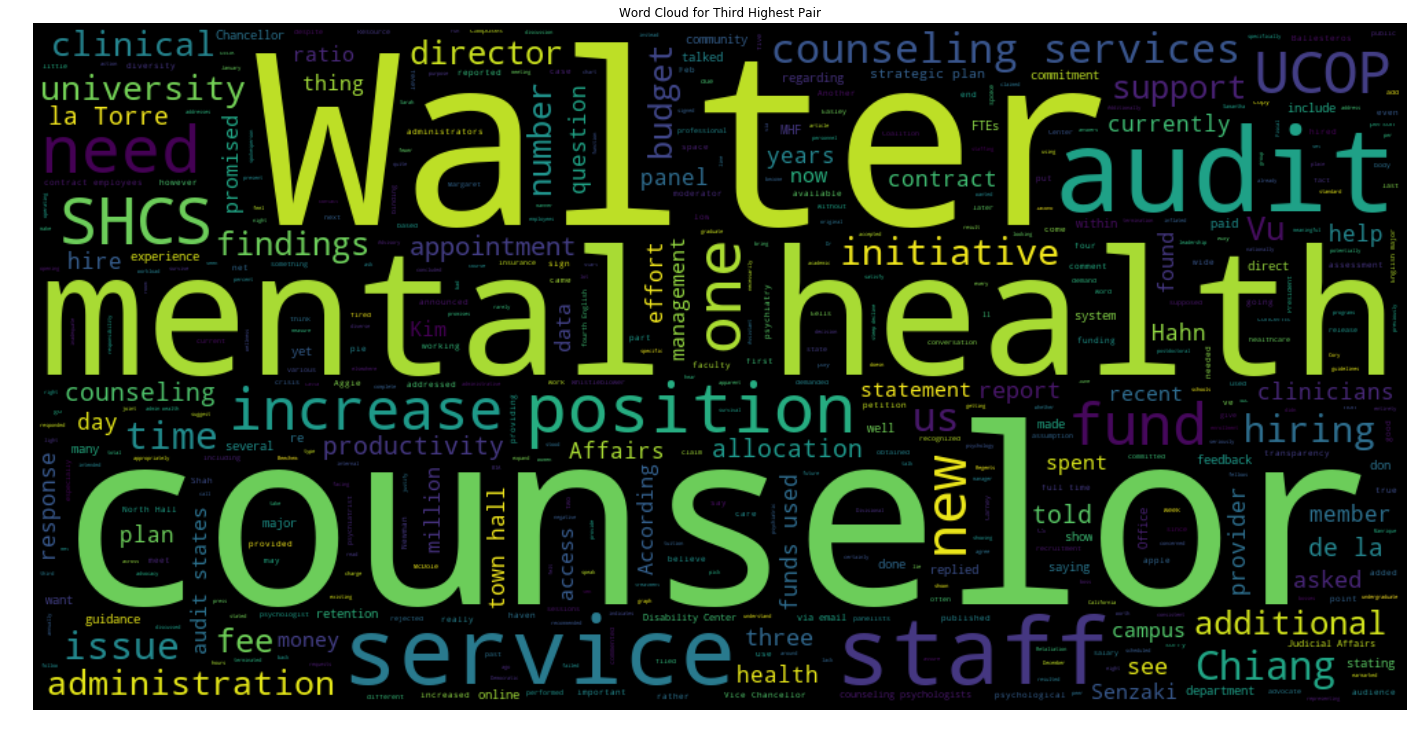

In [23]:
# create wordclouds for the pairs
print(cnl.iloc[t3[0][0],:]["title"], "and", cnl.iloc[t3[0][1],:]["title"])
text = "".join([cnl.iloc[t3[0][0],:]["text"],cnl.iloc[t3[0][1],:]["text"]])

wc = wordcloud.WordCloud(max_words=2500, stopwords=new_stw, margin=10,
               random_state=5,width = 1000,height = 500).generate(text)

plt.figure(figsize=(20,10))
plt.title("Word Cloud for Third Highest Pair")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

UC Regents approve nonresident tuition hike and UC Regents will vote on nonresident tuition hike on Wednesday


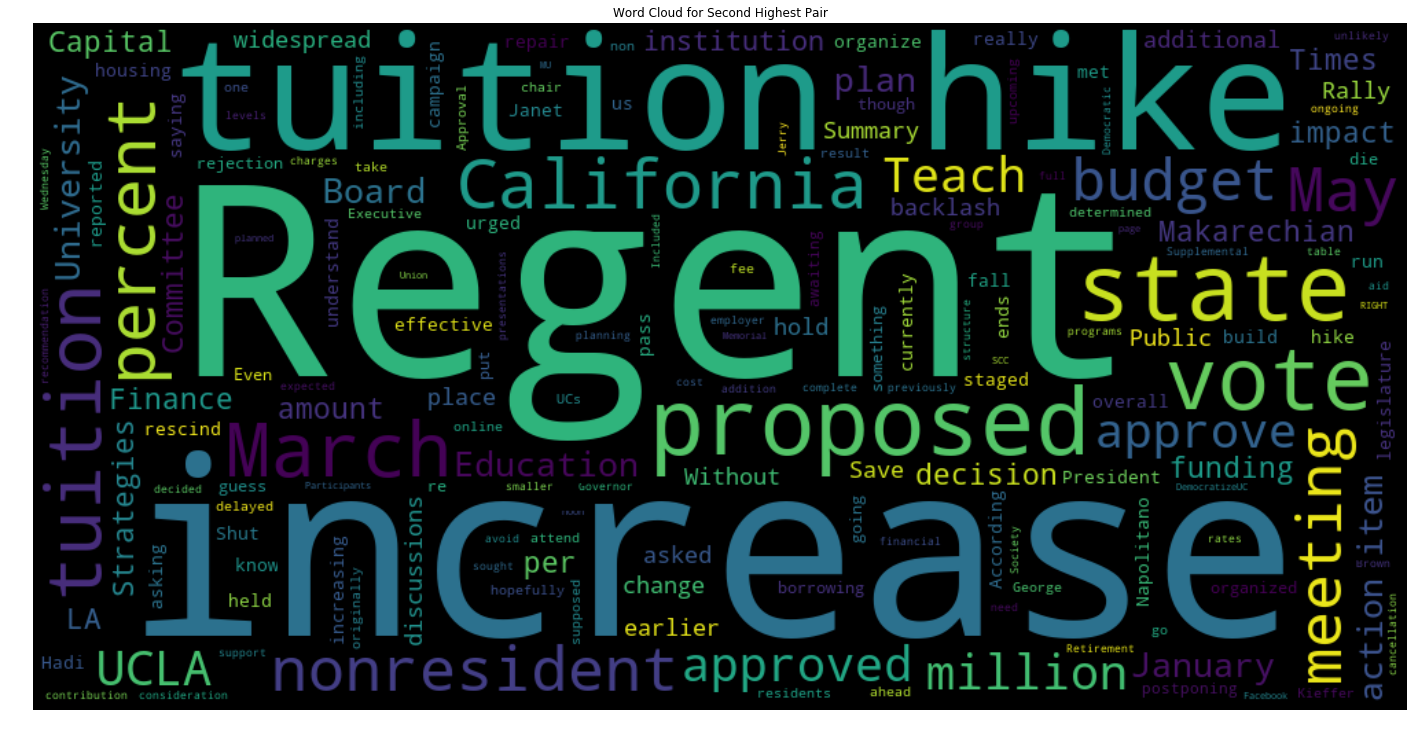

In [24]:
#create a word cloud for the pairs

text = "".join([cnl.iloc[t3[1][0],:]["text"],cnl.iloc[t3[1][1],:]["text"]])

print(cnl.iloc[t3[1][0],:]["title"], "and", cnl.iloc[t3[1][1],:]["title"])
wc = wordcloud.WordCloud(max_words=2500, stopwords=new_stw, margin=10,
               random_state=5,width = 1000,height = 500).generate(text)

plt.figure(figsize=(20,10))
plt.title("Word Cloud for Second Highest Pair")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Adam Hatefi and Shreya Deshpande disqualified after missing mandatory Candidate Workshop and Executive ticket candidates claim biases against non-ASUCD affiliated individuals


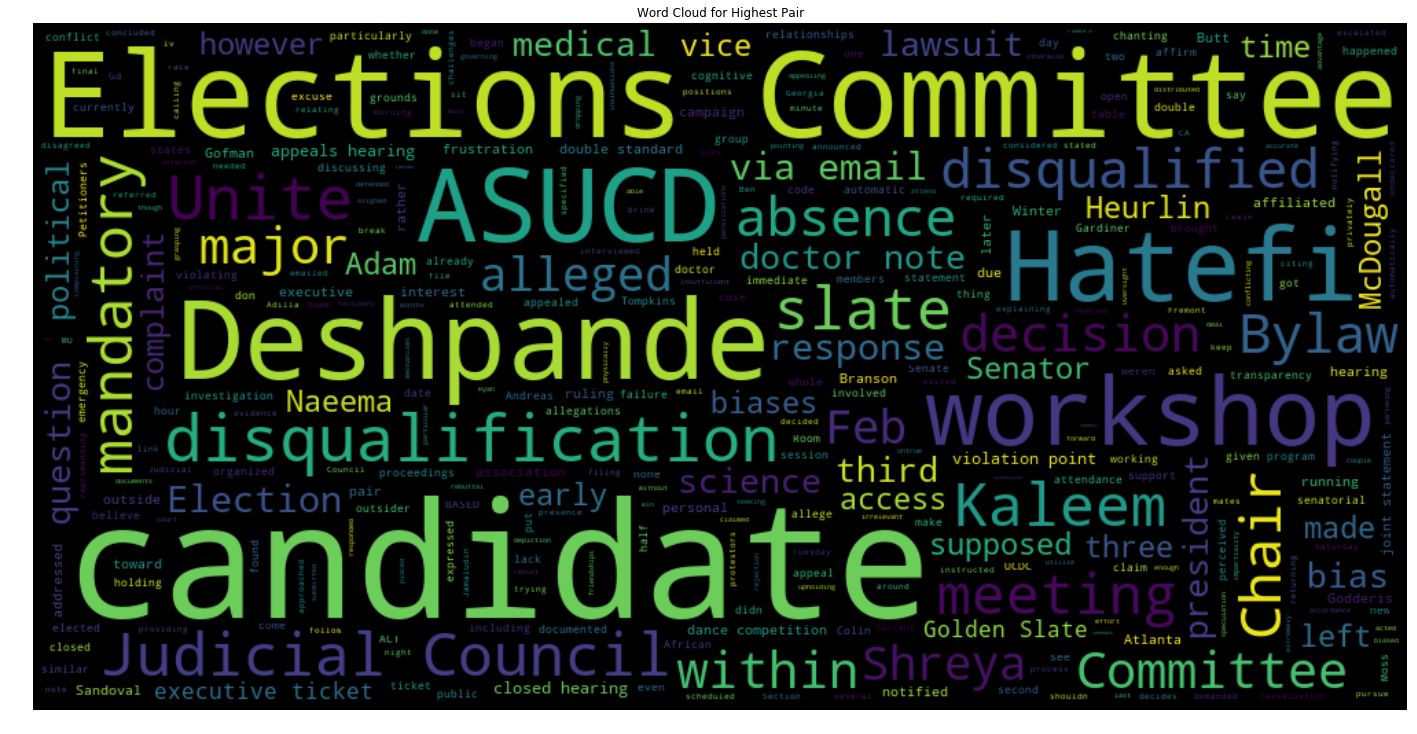

In [25]:
#Create a word cloud for the highest pair

text = "".join([cnl.iloc[t3[2][0],:]["text"],cnl.iloc[t3[2][1],:]["text"]])

print(cnl.iloc[t3[2][0],:]["title"], "and", cnl.iloc[t3[2][1],:]["title"])
wc = wordcloud.WordCloud(max_words=2500, stopwords=new_stw, margin=10,
               random_state=5,width = 1000,height = 500).generate(text)

plt.figure(figsize=(20,10))
plt.title("Word Cloud for Highest Pair")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

From the word cloud plots above, we can see that the Aggie seems to cover topics associated with "commnity" and "campus" the most, which makes sense, since it's a student run newspaper that would have many articles targeted towards the campus community.  Yes, the city articles and campus articles cover different topics.  City articles cover topics that are more related to Sacramento and seem to cover more general events, like city councils and homelessness.  Campus articles seem to cover things more related to UC Davis campus life, obviously, covering toics like the "university" and "ASUCD".

### What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

The third highest pair of articles were "ASUCD Senate candidates debate to largely inattentive crowd" and "2018 ASUCD Winter Elections — meet the candidates".  These two articles have "the words "ASUCD", "candidate", "Senate" as well as other words relating to the ASUCD elections in common.  This makes sense since both articles are covering the ASUCD elections.

The second highest pairs of articles were "Internal audit reveals steep decline in counselors, $250,000 worth of questionably allocated funds" and "Mental Health Town Hall erupts in protest".  These articles have the worlds "mental health", "walter", and "counseler" in common, as well as other words associated with counseling services and services in general.  This makes sense, becuase if you look at the articles, one is covering how there is a decline in funding for counselers, specifically citing how it will impact the mental health treatments, and the other is an article covering a protest at a town hall about said topic.

The highest pair of articles were "Adam Hatefi and Shreya Deshpande disqualified after missing mandatory Candidate Workshop" and "Executive ticket candidates claim biases against non-ASUCD affiliated individuals". These articles have the words "candidate", "elections", and "committee" as well as other terms associated with the hearings.  This makes sense as wellbecause the first article is talking about how two candidates were disqualified after missing a workshop, and the second article is discussing if there is bias against non-ASUCD individuals, specifically the two aforementioned individuals.

***disclaimer: When I had first ran the code earlier in the week, there were 2 articles that had almost identical text, the only difference was the date, those articles were no longer pulled, because I believe one of them is not in the most recent 120 articles.

### Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning

No I don't believe that the entire Aggie could be represented by this corpus, since we only looked at two sections of the corpus.  Those being "city" and "campus" articles.  So the corpus would only be accurately representative of the campus and city sections of the Aggie.  There is also recency bias that would make more recent events, over represented in the data.  We could make inferences about what events are covered in the Aggie recently, but couldn't extend our knowledge beyond that.  